In [1]:
# Exploratory Data Analysis
# Only run once
import sys
import os

project_root = os.path.abspath('../')
os.chdir(project_root)

src_path = os.path.abspath(os.path.join(os.getcwd(), 'src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Setup

In [2]:
from utils.load_data import DataLoader
from utils.preprocess import Preprocessor, FeatureEngineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dl = DataLoader()
pre = Preprocessor()
fe = FeatureEngineering()

In [3]:
train = dl.load_data('train.csv', 'data/raw')
test = dl.load_data('test.csv', 'data/raw')

# train_clean = dl.load_data('train_clean.csv', 'data/processed')
# test_clean = dl.load_data('test_clean.csv', 'data/processed')

train_df = train.copy()
test_df = test.copy()

# train_df = train_clean.copy()
# test_df = test_clean.copy()

# EDA

## Info

In [5]:
dl.data_info(train)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate          

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dl.preview_data(train)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [7]:
dl.data_info(test)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  int64  
 2   alcohol_consumption_per_week        300000 non-null  int64  
 3   physical_activity_minutes_per_week  300000 non-null  int64  
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  int64  
 10  diastolic_bp                        300000 non-null  int64  
 11  heart_rate          

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,849999.500000,50.432397,2.089693,92.349087,5.945838,6.997795,6.011278,25.881906,0.859007,116.374117,75.396013,70.048350,187.308620,53.813557,103.416083,123.538480,0.152920,0.184410,0.033110
std,86602.684716,11.938741,1.066214,62.187399,1.481068,0.914693,2.060472,2.894289,0.038523,11.252146,6.950340,7.090543,18.413053,8.398126,20.571855,28.965441,0.359911,0.387819,0.178924
min,700000.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.690000,91.000000,51.000000,42.000000,107.000000,22.000000,51.000000,31.000000,0.000000,0.000000,0.000000
25%,774999.750000,42.000000,1.000000,51.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,174.000000,48.000000,89.000000,104.000000,0.000000,0.000000,0.000000
50%,849999.500000,50.000000,2.000000,77.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000
75%,924999.250000,59.000000,3.000000,115.000000,7.000000,7.600000,7.400000,27.800000,0.890000,124.000000,80.000000,75.000000,200.000000,60.000000,117.000000,142.000000,0.000000,0.000000,0.000000
max,999999.000000,89.000000,9.000000,748.000000,9.900000,9.900000,15.900000,38.300000,1.050000,170.000000,104.000000,101.000000,285.000000,91.000000,226.000000,290.000000,1.000000,1.000000,1.000000


In [8]:
dl.preview_data(test)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


## Cleaning and validate (!)

In [12]:
def validate_and_clean_data(df, name="data", is_test=False):
    print(f"=== Data Validation and Cleaning for {name} ===")
    df_clean = df.copy()
    
    skip_cols = ['id']
    if not is_test:
        skip_cols.append('target')
    
    print("\n1. Checking numeric columns for non-numeric values:")
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        if col in skip_cols:
            continue

        str_values = df_clean[col].astype(str)
        non_numeric_mask = ~str_values.str.match(r'^-?\d*\.?\d*$')
        non_numeric_count = non_numeric_mask.sum()

        if non_numeric_count > 0:
            print(f"  - {col}: Found {non_numeric_count} non-numeric values")
            print(f"    Sample values: {df_clean[col][non_numeric_mask].unique()[:5]}")

            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    print("\n2. Checking categorical columns for data type issues:")
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        unique_vals = df_clean[col].unique()
        print(f"  - {col}: {len(unique_vals)} unique values")
        print(f"    Sample values: {unique_vals[:5]}")
        
        df_clean[col] = df_clean[col].astype('category')
        
        if len(unique_vals) > 50:
            try:
                numeric_test = pd.to_numeric(df_clean[col], errors='coerce')
                if numeric_test.notna().sum() / len(df_clean) > 0.8:
                    print(f"    WARNING: {col} might be numeric but stored as object")
                    print(f"    Consider converting to numeric type")
            except:
                pass
    
    print("\n3. Checking for constant columns:")
    constant_cols = [col for col in df_clean.columns if df_clean[col].nunique() <= 1]
    if constant_cols:
        print(f"  Found {len(constant_cols)} constant columns:")
        for col in constant_cols:
            print(f"    - {col}: {df_clean[col].iloc[0] if len(df_clean) > 0 else 'Empty'}")
    else:
        print("  No constant columns found")
    
    print("\n4. Checking for duplicate columns:")
    duplicate_cols = []
    for i, col1 in enumerate(df_clean.columns):
        for col2 in df_clean.columns[i+1:]:
            if df_clean[col1].equals(df_clean[col2]):
                duplicate_cols.append((col1, col2))
    
    if duplicate_cols:
        print(f"  Found {len(duplicate_cols)} duplicate column pairs:")
        for col1, col2 in duplicate_cols:
            print(f"    - {col1} == {col2}")
    else:
        print("  No duplicate columns found")
    
    print(f"\n5. Data types summary after cleaning:")
    print(f"  - Numeric columns: {len(df_clean.select_dtypes(include=['int64', 'float64']).columns)}")
    print(f"  - Categorical columns: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")
    print(f"  - Other types: {len(df_clean.select_dtypes(exclude=['int64', 'float64', 'object', 'category']).columns)}")
    
    return df_clean

train_clean = validate_and_clean_data(train_df, "train")
test_clean = validate_and_clean_data(test_df, "test", is_test=True)

=== Data Validation and Cleaning for train ===

1. Checking numeric columns for non-numeric values:

2. Checking categorical columns for data type issues:
  - gender: 3 unique values
    Sample values: ['Female' 'Male' 'Other']
  - ethnicity: 5 unique values
    Sample values: ['Hispanic' 'White' 'Asian' 'Black' 'Other']
  - education_level: 4 unique values
    Sample values: ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
  - income_level: 5 unique values
    Sample values: ['Lower-Middle' 'Upper-Middle' 'Low' 'Middle' 'High']
  - smoking_status: 3 unique values
    Sample values: ['Current' 'Never' 'Former']
  - employment_status: 4 unique values
    Sample values: ['Employed' 'Retired' 'Student' 'Unemployed']

3. Checking for constant columns:
  No constant columns found

4. Checking for duplicate columns:
  No duplicate columns found

5. Data types summary after cleaning:
  - Numeric columns: 20
  - Categorical columns: 6
  - Other types: 0
=== Data Validation and Cleaning for

In [13]:
def update_column_definitions(df, is_test=False):
    cols_to_drop = ['id']
    if not is_test:
        cols_to_drop.append('target')
    
    available_cols = [col for col in cols_to_drop if col in df.columns]
    df_features = df.drop(columns=available_cols)
    
    num_cols_updated = df_features.select_dtypes(include=['float64', 'int64']).columns
    cat_cols_updated = df_features.select_dtypes(include=['object', 'category']).columns
    
    print("Updated column definitions:")
    print(f"Numerical columns ({len(num_cols_updated)}): {list(num_cols_updated)}")
    print(f"Categorical columns ({len(cat_cols_updated)}): {list(cat_cols_updated)}")
    
    return num_cols_updated, cat_cols_updated

num_cols_clean, cat_cols_clean = update_column_definitions(train_clean, is_test=False)
num_cols_test, cat_cols_test = update_column_definitions(test_clean, is_test=True)

Updated column definitions:
Numerical columns (19): ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']
Categorical columns (6): ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
Updated column definitions:
Numerical columns (18): ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
Categoric

In [16]:
def fix_data_types(df):
    df_fixed = df.copy()
    
    for col in df_fixed.select_dtypes(include=['int64', 'float64']).columns:
        if col in ['id', 'target']:
            continue
        
        df_fixed[col] = pd.to_numeric(df_fixed[col], errors='coerce')
        
        if df_fixed[col].isna().sum() > df[col].isna().sum():
            print(f"Fixed non-numeric values in column '{col}'")
    
    return df_fixed

print("Checking and fixing data type issues...")
train_df = fix_data_types(train_df)
test_df = fix_data_types(test_df)

Checking and fixing data type issues...


In [17]:
train_clean.to_csv('data/processed/train_clean.csv', index=False)
test_clean.to_csv('data/processed/test_clean.csv', index=False)

In [4]:
num_cols = train_df.drop(columns=['id', 'diagnosed_diabetes']).select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_df.drop(columns=['id', 'diagnosed_diabetes']).select_dtypes(include=['object', 'category', 'bool']).columns
num_cols_test = test_df.drop(columns=['id']).select_dtypes(include=['float64', 'int64']).columns
cat_cols_test = test_df.drop(columns=['id']).select_dtypes(include=['object', 'category', 'bool']).columns

## Missing value

In [9]:
def show_missing(df, name="data"):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if not missing.empty:
        print(f"Missing values in {name}:")
        display(missing)
        missing.plot(kind='bar', title=f'Missing Values in {name}')
        plt.show()
    else:
        print(f"No missing values found in {name}.")

In [12]:
show_missing(train_df, "train")

No missing values found in train.


## Data distribution

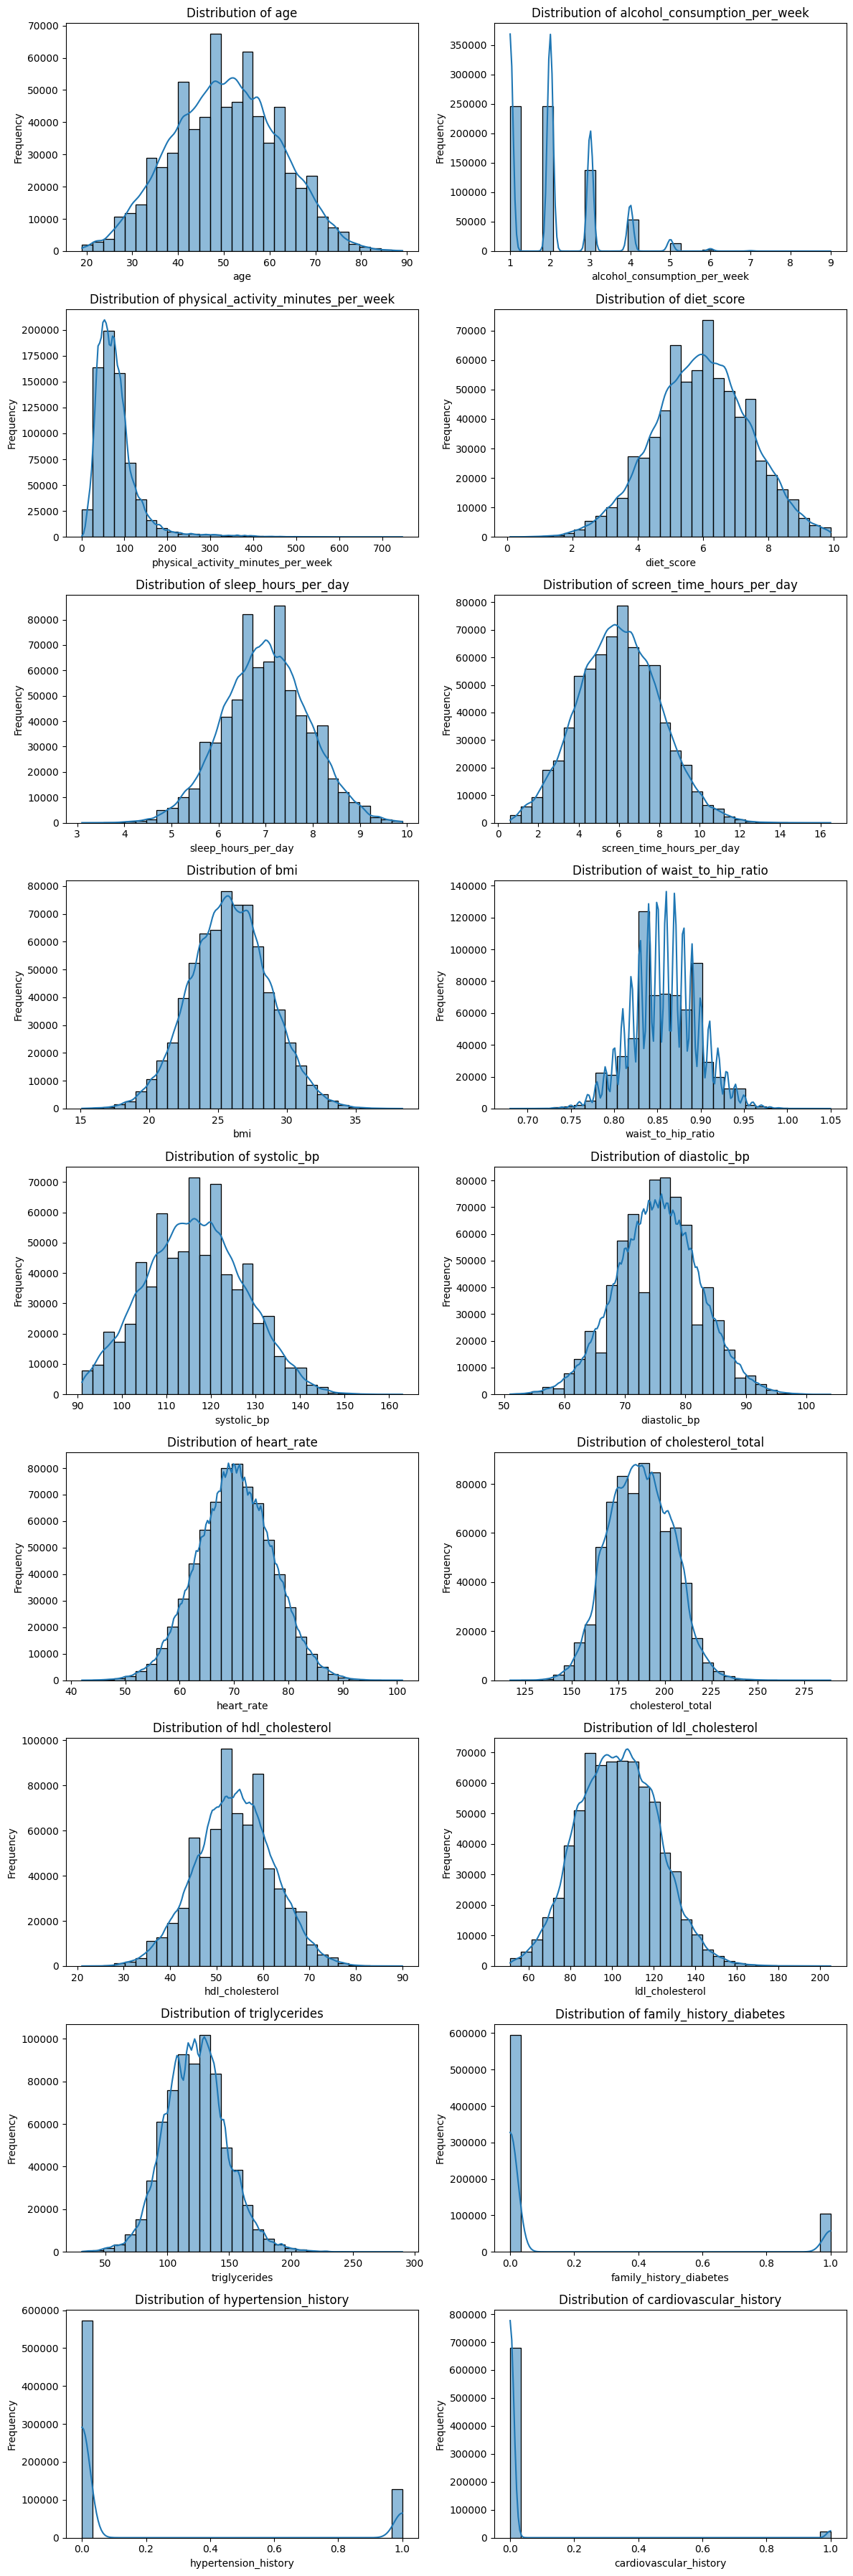

In [15]:
if len(num_cols) > 0:
    n_cols = 2
    n_rows = -(-len(num_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    if n_rows == 1 and len(num_cols) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.histplot(train_df, x=col, kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    for i in range(len(num_cols), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found in the dataset.")

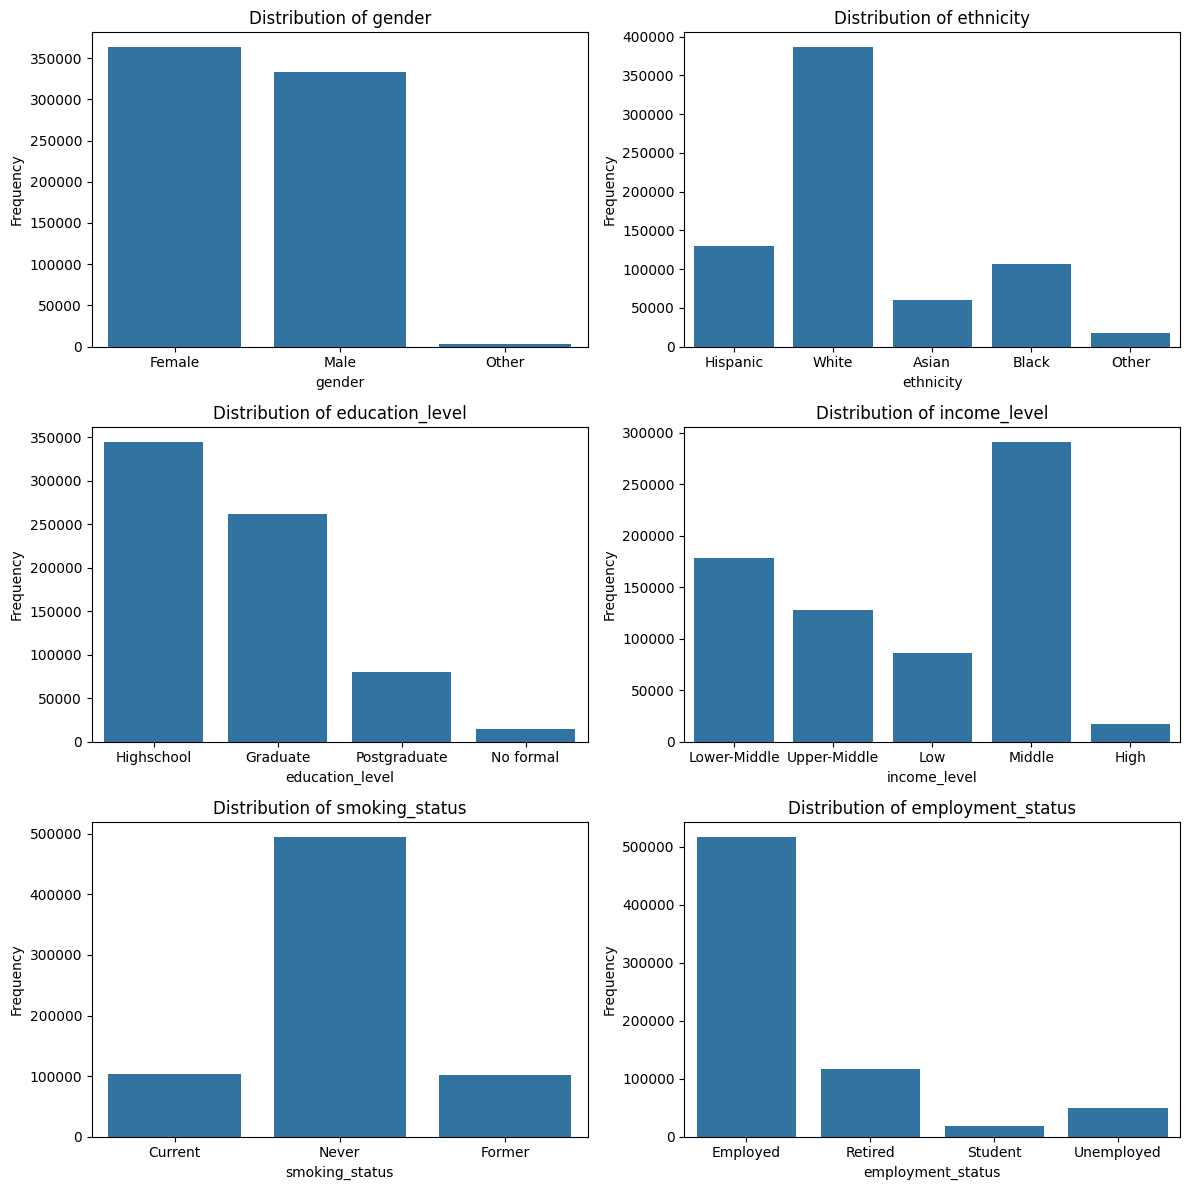

In [16]:
if len(cat_cols) > 0:
    n_cols = 2
    n_rows = -(-len(cat_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    if n_rows == 1 and len(cat_cols) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.countplot(train_df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].set_ylabel('Frequency')

    for i in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found in the dataset.")

## Outlier

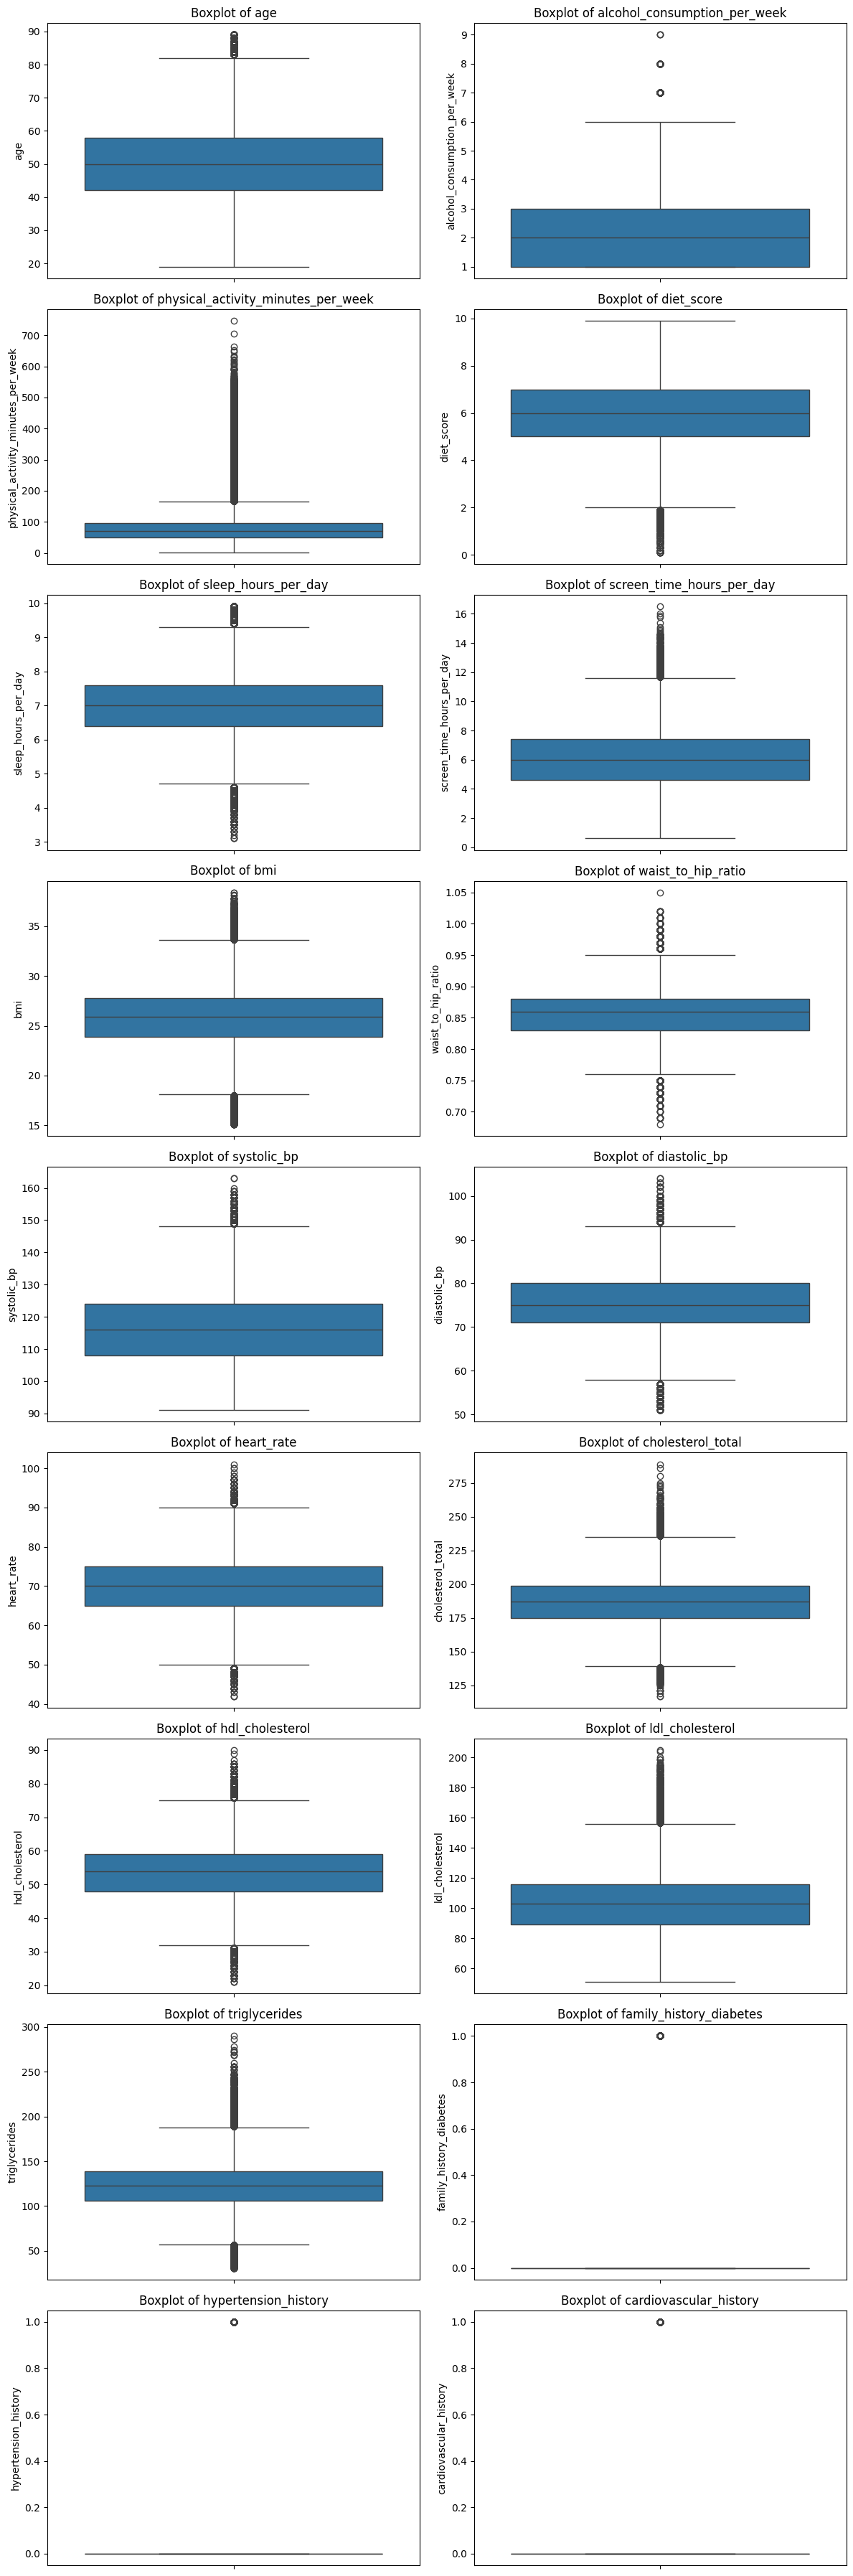

In [17]:
if len(num_cols) > 0:
    n_cols = 2
    n_rows = -(-len(num_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    if n_rows == 1 and len(num_cols) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(train_df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)
        
    for i in range(len(num_cols), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found in the dataset.")

## Feature-target relationship analysis

### Numerical and target

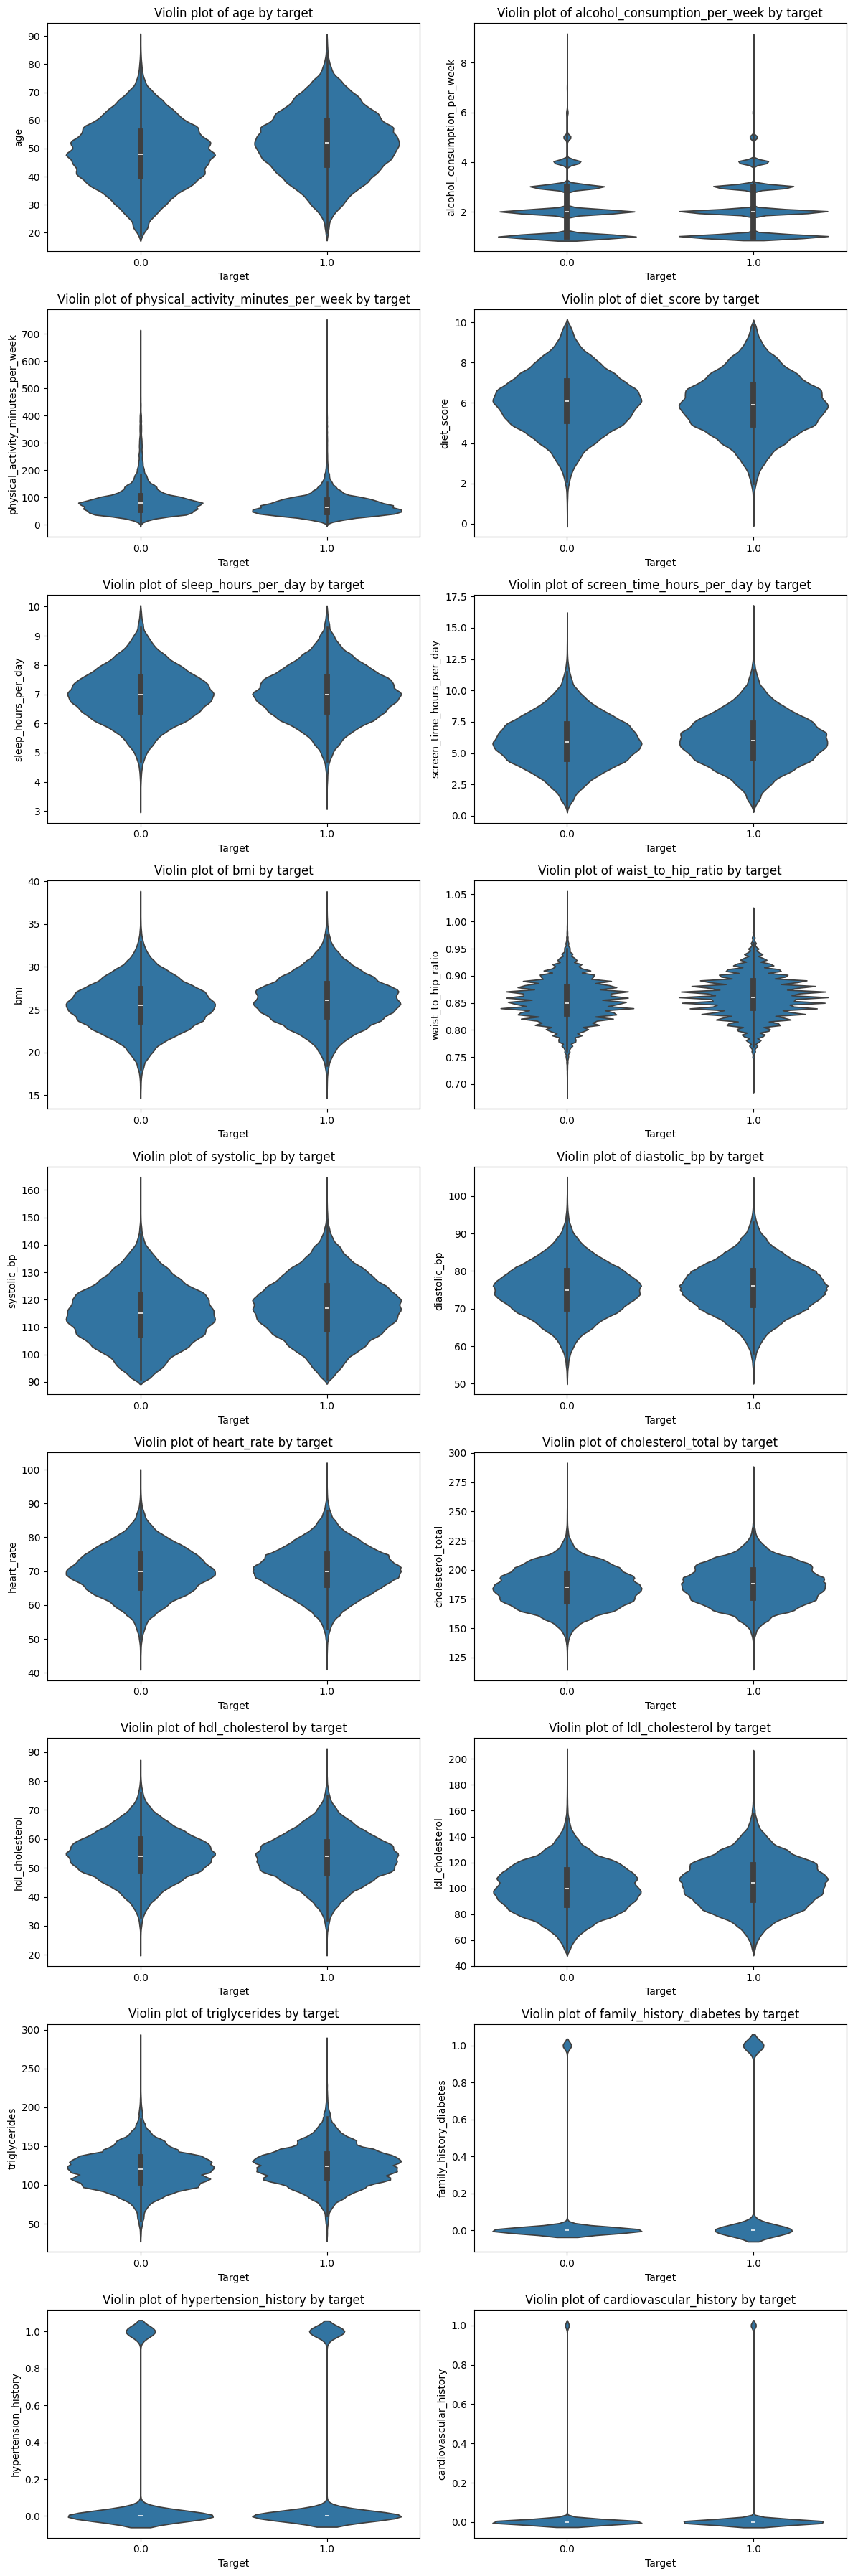

In [19]:
if len(num_cols) > 0:
    n_cols = 2
    n_rows = -(-len(num_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    if n_rows == 1 and len(num_cols) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.violinplot(train_df, x='diagnosed_diabetes', y=col, ax=axes[i])
        axes[i].set_title(f'Violin plot of {col} by target')
        axes[i].set_xlabel('Target')
        axes[i].set_ylabel(col)
        
    for i in range(len(num_cols), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for violin plot analysis.")

### Categorical and target

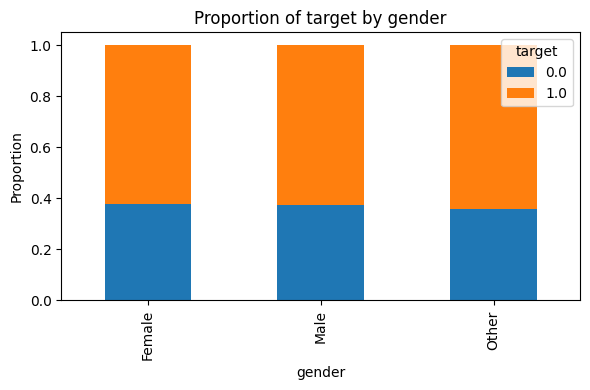

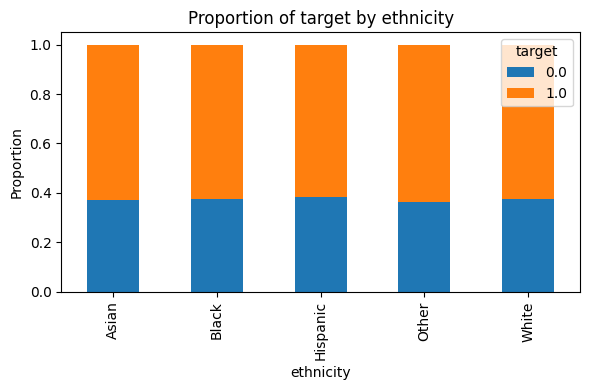

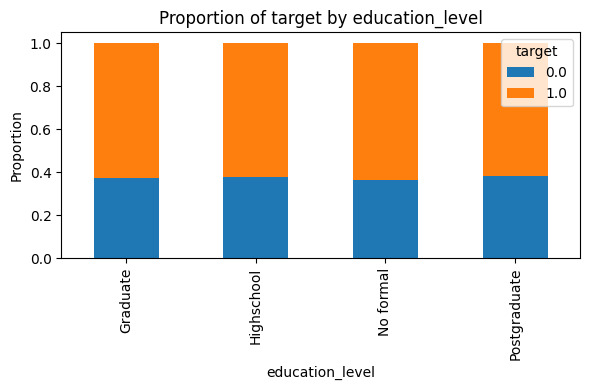

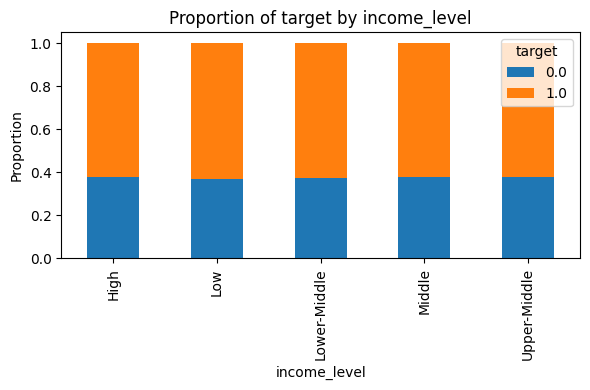

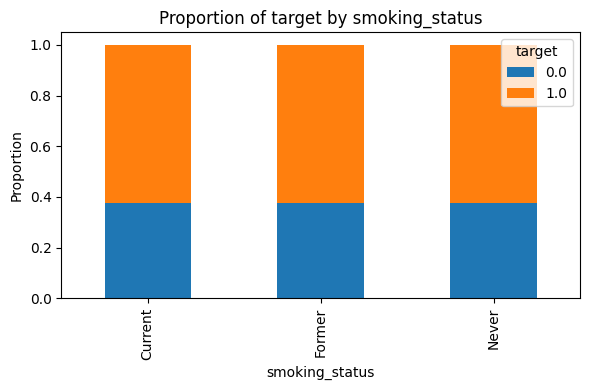

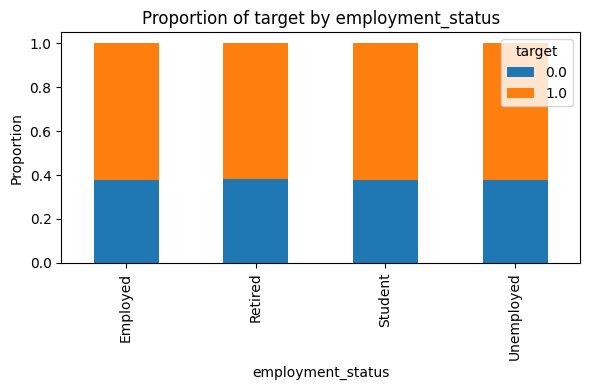

In [21]:
if len(cat_cols) > 0:
    for col in cat_cols:
        ct = pd.crosstab(train_df[col], train_df['diagnosed_diabetes'], normalize='index')
        ct.plot(kind='bar', stacked=True, figsize=(6, 4))
        plt.title(f'Proportion of target by {col}')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.legend(title='target', loc='upper right')
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns to analyze with target.")

## Pairplot matrix

In [ ]:
if len(num_cols) > 0:
    pairplot_cols = num_cols.tolist() + ['diagnosed_diabetes']
    
    sns.pairplot(train_df[pairplot_cols], hue='diagnosed_diabetes', diag_kind='kde', palette="Set1", corner=True)
    plt.suptitle('Pairplot of Numerical Features with Target', y=1.02)
    plt.show()
else:
    print("No numerical columns found for pairplot analysis.")

## Multicolinearity analysis

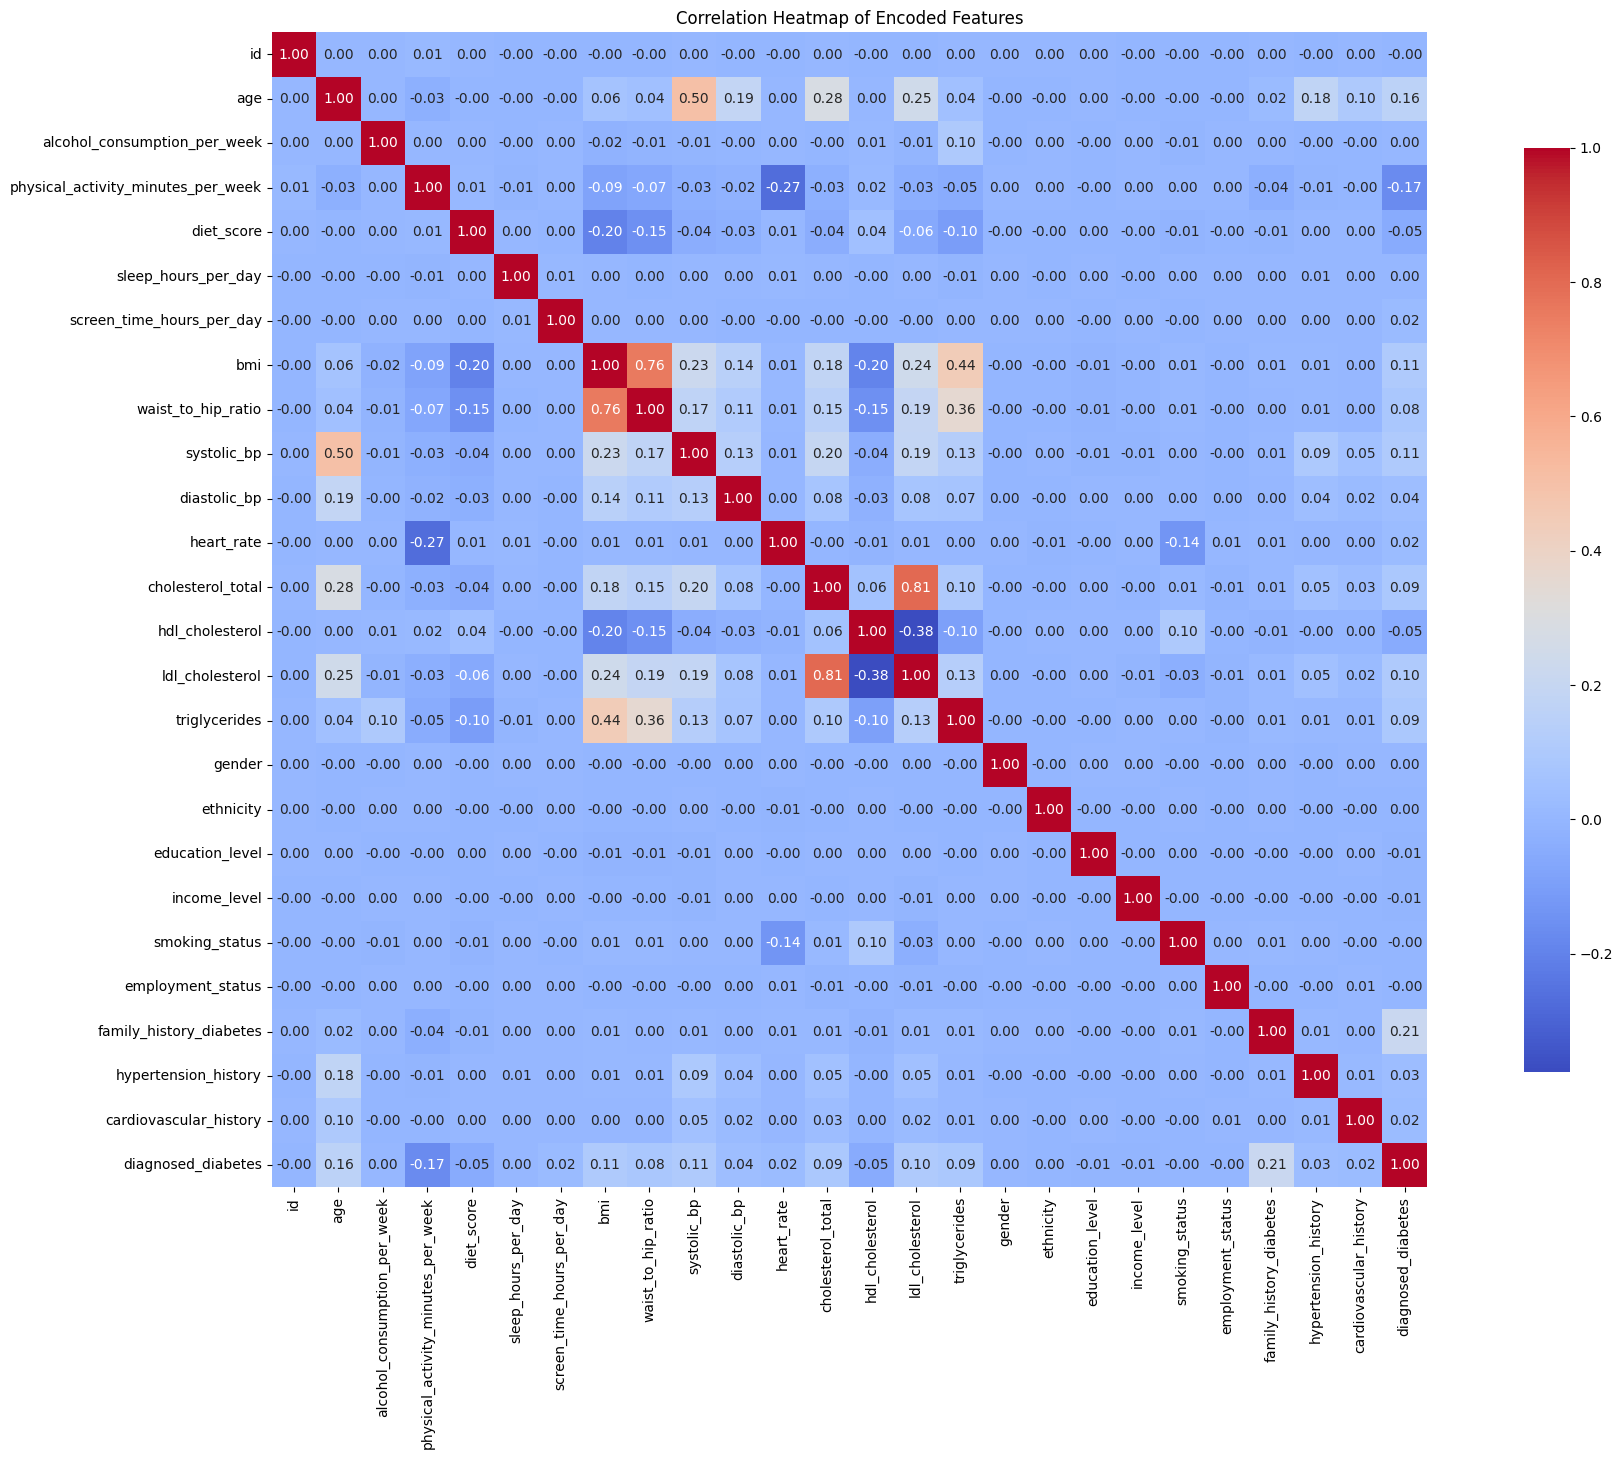

In [7]:
train_to_encode = train_df.copy()
train_encoded = pre.label_encode(train_to_encode)
train_corr = train_encoded.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(train_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

In [8]:
def analyze_correlation(corr_matrix, top_n=5):
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    top_pos = corr_pairs.sort_values(by='Correlation', ascending=False).head(top_n)
    top_neg = corr_pairs.sort_values(by='Correlation').head(top_n)
    print("Top positively correlated feature pairs:")
    display(top_pos)
    print("\nTop negatively correlated feature pairs:")
    display(top_neg)

analyze_correlation(train_corr, top_n=5)

Top positively correlated feature pairs:


,Feature 1,Feature 2,Correlation
235,cholesterol_total,ldl_cholesterol,0.805909
154,bmi,waist_to_hip_ratio,0.757191
32,age,systolic_bp,0.502894
161,bmi,triglycerides,0.443837
178,waist_to_hip_ratio,triglycerides,0.359802



Top negatively correlated feature pairs:


,Feature 1,Feature 2,Correlation
247,hdl_cholesterol,ldl_cholesterol,-0.375791
79,physical_activity_minutes_per_week,heart_rate,-0.268426
96,diet_score,bmi,-0.198899
159,bmi,hdl_cholesterol,-0.197702
93,physical_activity_minutes_per_week,diagnosed_diabetes,-0.169789


## Skewness and kurtosis analysis

,skew,kurtosis
age,0.020905,-0.386740
alcohol_consumption_per_week,0.932375,0.704179
physical_activity_minutes_per_week,2.814197,13.197071
diet_score,-0.062970,-0.161252
sleep_hours_per_day,0.001486,-0.059950
screen_time_hours_per_day,0.114110,-0.132787
bmi,0.032107,-0.022284
waist_to_hip_ratio,0.037716,0.011097
systolic_bp,0.097208,-0.393847
diastolic_bp,-0.001377,-0.037275


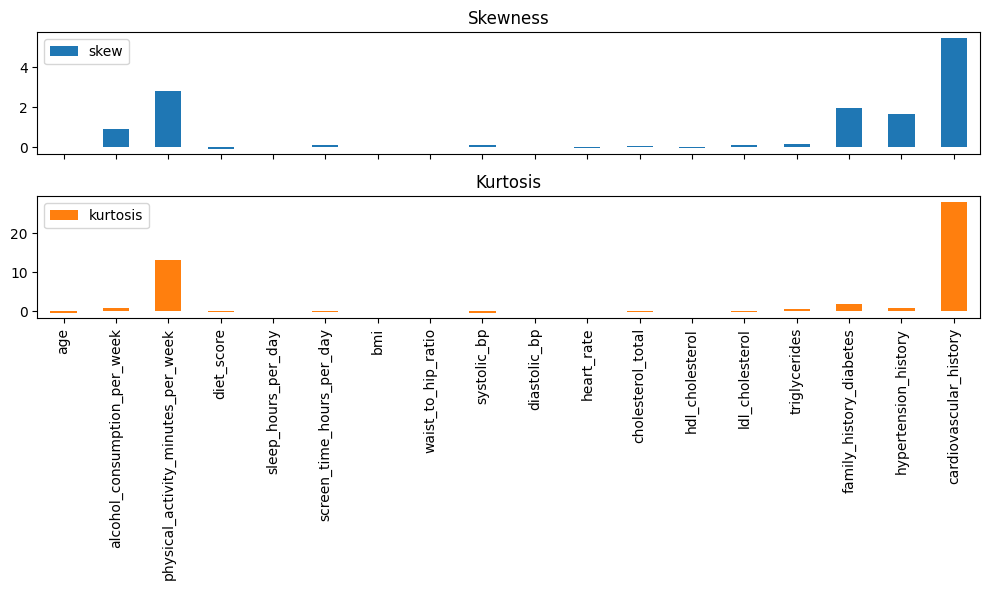

In [9]:
if len(num_cols) > 0:
    skew_kurt = pd.DataFrame({
        'skew': train_df[num_cols].skew(),
        'kurtosis': train_df[num_cols].kurt()
    })

    display(skew_kurt)

    skew_kurt.plot(kind='bar', subplots=True, layout=(2, 1), figsize=(10, 6), title=['Skewness', 'Kurtosis'])
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for skewness and kurtosis analysis.")

## Unique values and category frequency analysis

In [10]:
if len(cat_cols) > 0:
    for col in cat_cols:
        print(f"Feature: {col}")
        print(f"  Unique category count: {train_df[col].nunique()}")
        if train_df[col].nunique() > 0:
            top_cat = train_df[col].value_counts().idxmax()
            top_freq = train_df[col].value_counts().max()
            print(f"  Most frequent categories: {top_cat} ({top_freq} data)")
        print("-" * 45)
else:
    print("No categorical columns found in the dataset.")
    print("All features appear to be numerical.")

Feature: gender
  Unique category count: 3
  Most frequent categories: Female (363237 data)
---------------------------------------------
Feature: ethnicity
  Unique category count: 5
  Most frequent categories: White (386153 data)
---------------------------------------------
Feature: education_level
  Unique category count: 4
  Most frequent categories: Highschool (344145 data)
---------------------------------------------
Feature: income_level
  Unique category count: 5
  Most frequent categories: Middle (290557 data)
---------------------------------------------
Feature: smoking_status
  Unique category count: 3
  Most frequent categories: Never (494448 data)
---------------------------------------------
Feature: employment_status
  Unique category count: 4
  Most frequent categories: Employed (516170 data)
---------------------------------------------


## Constant value analysis

In [11]:
constant_cols = [col for col in train_df.columns if train_df[col].nunique() == 1]
if constant_cols:
    print("Columns with constant values (only one unique value):")
    for col in constant_cols:
        print(f"- {col}: {train_df[col].unique()[0]}")
else:
    print("There are no columns with constant values.")

There are no columns with constant values.
